In [1]:
# Introduction

"""This analysis focuses on merging two key datasets: *Transaction Data* and *Purchase Behavior Data* to provide deeper insights into customer 
purchasing patterns and behaviors. By combining transaction details with customer demographics, the goal is to better understand how different 
customer segments interact with products and to identify trends that can help improve business performance."""


'This analysis focuses on merging two key datasets: *Transaction Data* and *Purchase Behavior Data* to provide deeper insights into customer \npurchasing patterns and behaviors. By combining transaction details with customer demographics, the goal is to better understand how different \ncustomer segments interact with products and to identify trends that can help improve business performance.'

In [2]:
import pandas as pd

transaction = pd.read_excel("QVI_transaction_data.xlsx")
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


# Data Cleaning Process

In [4]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [5]:
transaction.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
#Checking for Nan values
transaction.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [8]:
#drop rows with missing values
transaction = transaction.dropna()

In [9]:
transaction.fillna(0,inplace=True)

# Checking Data Formats and Correcting

In [11]:
transaction["DATE"] = pd.to_datetime(transaction["DATE"])

In [12]:
transaction["TOT_SALES"] = transaction["TOT_SALES"].astype("int")

In [13]:
#Renaming columns
transaction.rename(columns={"TXN_ID":"TRANSACTION_ID","TOT_SALES":"TOTAL_SALES"},inplace=True)

In [14]:
transaction.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TRANSACTION_ID             int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOTAL_SALES                int32
dtype: object

In [15]:
transaction.drop_duplicates()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TRANSACTION_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOTAL_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7


In [16]:
transaction["PROD_NAME"].value_counts()

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64

In [17]:
transaction["PROD_NAME"].nunique()

114

# Finding Outliers and Removing them Using Z-Score

In [19]:
from scipy import stats

# Calculating Z-scores for each numerical column
z_scores = stats.zscore(transaction.select_dtypes(include=[float, int]))

In [20]:
# Filter out rows where any Z-score is greater than 3 or less than -3
transaction_data_cleaned = transaction[(z_scores < 3).all(axis=1)]

In [21]:
transaction_data_cleaned.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TRANSACTION_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOTAL_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5


# Purchase Behaviour Data Upload

In [23]:
purchase = pd.read_csv("QVI_purchase_behaviour.csv")
purchase

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


# Data Cleaning Process

In [25]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [26]:
#Checking data types
purchase.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [27]:
import warnings 
warnings.filterwarnings("ignore")

In [28]:
#Checking for NAN values
purchase.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [29]:
#Filling NAN values
purchase.fillna(0,inplace=True)

In [30]:
purchase.drop_duplicates()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [31]:
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# Finding Outliers and Removing Them Using Z-Score

In [33]:
# Calculating Z-scores for each numerical column
z_scores = stats.zscore(purchase.select_dtypes(include=[float, int]))

In [34]:
# Filter out rows where any Z-score is greater than 3 or less than -3
purchase_data_cleaned = purchase[(z_scores < 3).all(axis=1)]

In [35]:
purchase_data_cleaned.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# Merging both dataset " Transaction Data" and "Purchase Data"

In [37]:
# Merging the two dataset on LYLTY_CARD_NBR
merged_data = pd.merge(transaction_data_cleaned,purchase_data_cleaned, on="LYLTY_CARD_NBR", how="inner")

In [38]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TRANSACTION_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOTAL_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5,MIDAGE SINGLES/COUPLES,Budget


In [39]:
merged_data.dtypes

DATE                datetime64[ns]
STORE_NBR                    int64
LYLTY_CARD_NBR               int64
TRANSACTION_ID               int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOTAL_SALES                  int32
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object

# Generating Insights from the Dataset using Matplot and Seaborn

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

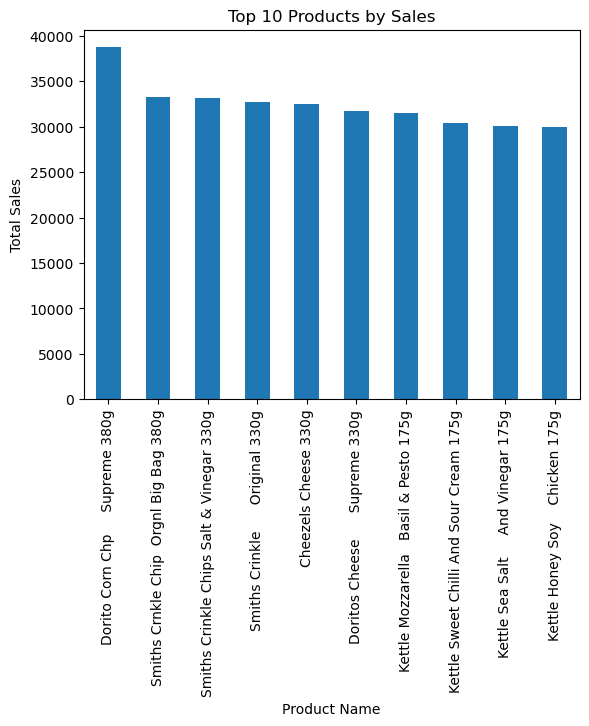

In [42]:
#Count top selling products
top_products = merged_data.groupby("PROD_NAME")["TOTAL_SALES"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar')
plt.title("Top 10 Products by Sales")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.show()

As seen on the above bar chart Dorito Corn Supreme 380g has the Top selling products which falls above 35000,
and the lowest is Kettle Honey Soy 175g. These bar chat helps to pinpoint the most popular products,ensuring these items
are prioritized for inventory and marking strategies.

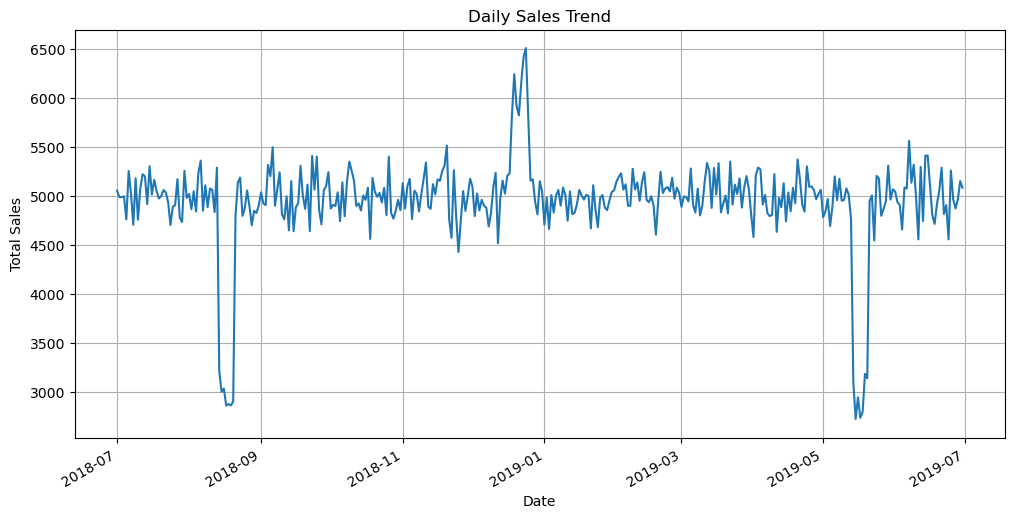

In [44]:
# Sales Trends over time
daily_totals = merged_data.groupby("DATE")["TOTAL_SALES"].sum()

plt.figure(figsize=(12, 6)) 
daily_totals.plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

This insight identifies peaks and dips in sales by helping to plan seasonal promotiona and understand the external factors on sales performance on daily bases.We can see that there is an increase in purchases in January and a break in July.

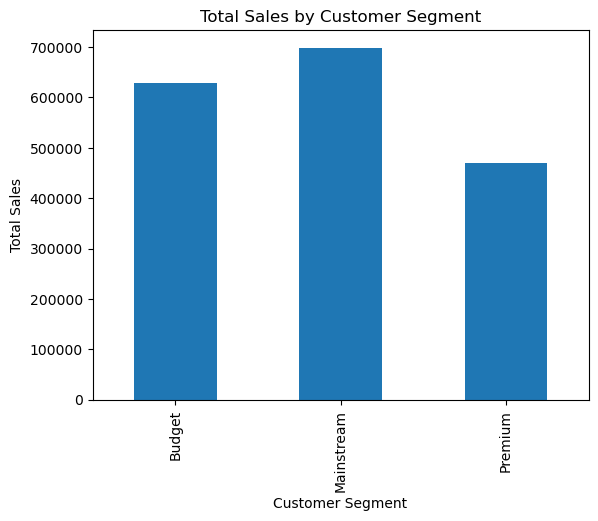

In [46]:
#Sales by customer segment
segment_sales = merged_data.groupby("PREMIUM_CUSTOMER")["TOTAL_SALES"].sum()

segment_sales.plot(kind="bar", title="Total Sales by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Sales")
plt.show()

- This shows total sales for each customer segments (Budget, Mainstream, Premium). It shows that Mainstream and Budget customers are likely driving the most sales.
- Data-driven strategies can optimize inventory and promotions,improving overall business performance.

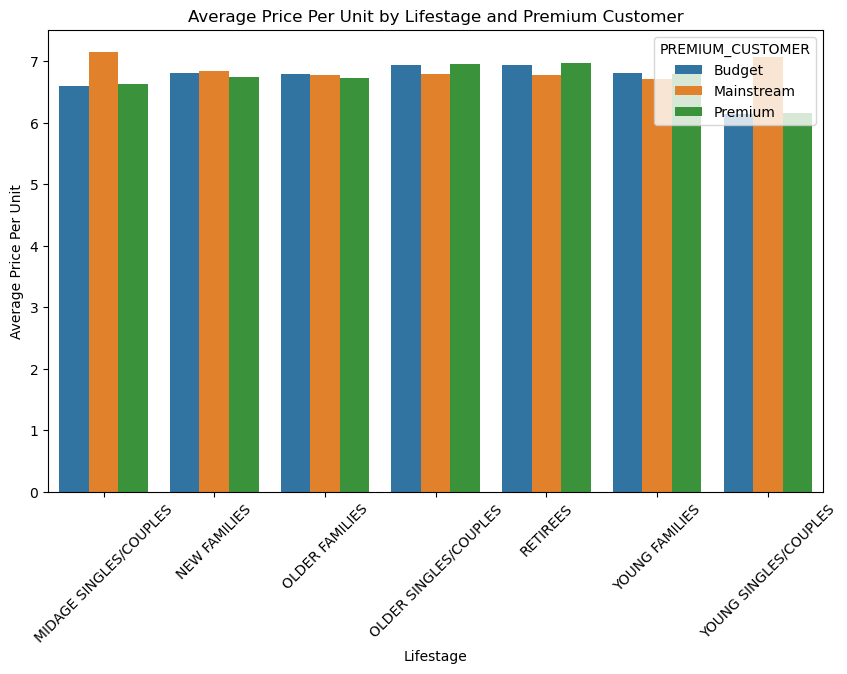

In [48]:
# Average price per unit by LIFESTAGE AND PREMIUM CUSTOMERS
avg_price_per_unit = merged_data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["TOTAL_SALES"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="LIFESTAGE", y="TOTAL_SALES",
            hue="PREMIUM_CUSTOMER",
data=avg_price_per_unit)
plt.title("Average Price Per Unit by Lifestage and Premium Customer")
plt.xlabel("Lifestage")
plt.ylabel("Average Price Per Unit")
plt.xticks(rotation=45)
plt.show()

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples
buying chips compared to their mainstream counterparts.

# RECOMMEDATIONS

1. *Personalized Marketing*: Use customer data to create targeted promotions for different customer groups (e.g., based on age or spending habits).
   
2. *Stock Popular Products*: Focus on keeping best-selling products in stock to avoid missed sales opportunities.

3. *Launch Loyalty Programs*: Reward frequent customers with discounts or exclusive offers to encourage repeat purchases.

4. *Seasonal Campaigns*: Plan promotions around peak sales periods or holidays to maximize revenue.

5. *Cross-Selling*: Suggest related products to customers at checkout to increase the value of each transaction.

6. *Price Optimization*: Adjust product prices based on customer spending behavior to find the best price points.

# CONCLUSION


Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population. 
The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segmentswhere young singles and couples frequent more often to increase visibilty and impulse behaviour.

In [54]:
merged_data.to_csv("Cleaned_data.csv", index=False)